In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [26]:
def plot_model_fps(fps, latents = None, q_thresh = 1e-5, label = "Model"):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x_star = fps.xstar
    q_star = fps.qstar
    q_flag = q_star < q_thresh
    stability= fps.is_stable
    x_star = x_star[q_flag]
    q_star = q_star[q_flag]
    pca = PCA(n_components=3)
    if latents is not None:
        lats_flat = latents.reshape(-1, latents.shape[-1])
        lats_flat = pca.fit_transform(lats_flat)
        lats_pca = lats_flat.reshape(latents.shape[0], latents.shape[1], 3)
        x_star = pca.transform(x_star)
        for i in range(30):
            ax.plot(lats_pca[i,:,0], lats_pca[i,:,1], lats_pca[i,:,2], linewidth=0.5)
    else:
        x_star = pca.fit_transform(x_star)
    stability = stability[q_flag]
    stable_X = x_star[stability]
    unstable_X = x_star[~stability]
    ax.scatter(stable_X[:,0], stable_X[:,1], stable_X[:,2], c='g', marker='o', label = "Stable")
    ax.scatter(unstable_X[:,0], unstable_X[:,1], unstable_X[:,2], c='r', marker='x', label = "Unstable")
    ax.set_title(f"{label} FPS")
    ax.legend()
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.savefig(f"fps_{label}.pdf")

In [3]:


HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240503_Fig1_NBFF_NoisyGRU/max_epochs=500 n_samples=1000 latent_size=64 seed=0 learning_rate=0.001/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)


path_GRU_Sweep = pathTT + "20240503_Fig1_NBFF_GRU_TT_GRU_Sweep/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

path_LDS_Sweep = pathTT + "20240503_Fig1_NBFF_LDS_TT_GRU_Sweep/"
subfolders_LDS = [f.path for f in os.scandir(path_LDS_Sweep) if f.is_dir()]

path_NODE_Sweep = pathTT + "20240503_Fig1_NBFF_NODE_TT_GRU_Sweep/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]


/home/csverst/Github/CtDBenchmark/


In [4]:
comparison = Comparison(comparison_tag="Figure1NBFF_TTGRU_Sweep")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU:
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_GRU, group = "GRU")

for subfolder in subfolders_LDS:
    subfolder = subfolder + "/"
    analysis_LDS = Analysis_DT(run_name = "LDS", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_LDS, group = "LDS")

for subfolder in subfolders_NODE:
    subfolder = subfolder + "/"
    analysis_NODE = Analysis_DT(run_name = "NODE", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_NODE, group = "NODE")


comparison.regroup()

Working on 1 of 16: GRU
Group: GRU
Rate R2: 0.9131743037015094
State R2: 0.8666798240464546
Working on 2 of 16: GRU
Group: GRU
Rate R2: 0.9145406346988467
State R2: 0.8501580410421541
Working on 3 of 16: GRU
Group: GRU
Rate R2: 0.9129292592909505
State R2: 0.880756483152413
Working on 4 of 16: GRU
Group: GRU
Rate R2: 0.9183182973660265
State R2: 0.8695784220634144
Working on 5 of 16: GRU
Group: GRU
Rate R2: 0.9207088047489809
State R2: 0.8533396494841006
Working on 6 of 16: LDS
Group: LDS
Rate R2: 0.341532217915147
State R2: 0.4356300380371022
Working on 7 of 16: LDS
Group: LDS
Rate R2: 0.33875120791768043
State R2: 0.4468804061100162
Working on 8 of 16: LDS
Group: LDS
Rate R2: 0.28734771273676
State R2: 0.4980617469062362
Working on 9 of 16: LDS
Group: LDS
Rate R2: 0.3303390901023281
State R2: 0.4506945357558323
Working on 10 of 16: LDS
Group: LDS
Rate R2: 0.33987322111195384
State R2: 0.4463409653482496
Working on 11 of 16: NODE
Group: NODE
Rate R2: 0.7644338486158673
State R2: 0.962

array([[0.9131743 , 0.86667982],
       [0.91454063, 0.85015804],
       [0.91292926, 0.88075648],
       [0.9183183 , 0.86957842],
       [0.9207088 , 0.85333965],
       [0.34153222, 0.43563004],
       [0.33875121, 0.44688041],
       [0.28734771, 0.49806175],
       [0.33033909, 0.45069454],
       [0.33987322, 0.44634097],
       [0.76443385, 0.9629215 ],
       [0.77449421, 0.97399046],
       [0.77008491, 0.9706376 ],
       [0.76745984, 0.96908352],
       [0.77143459, 0.97017245],
       [0.        , 0.        ]])

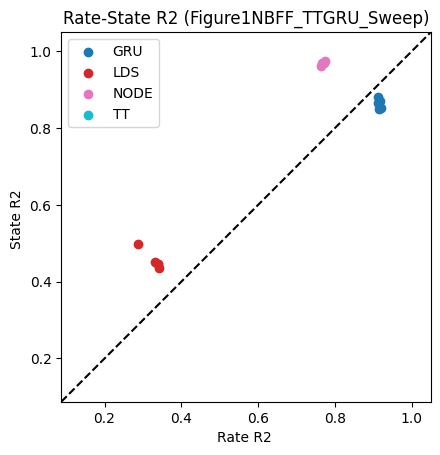

In [5]:
comparison.compare_rate_state_r2(save_pdf=True)


Iteration 500/40000
q = 4.24E-04 +/- 1.69E-03
dq = 1.47E-06 +/- 6.32E-06

Iteration 1000/40000
q = 1.31E-04 +/- 5.12E-04
dq = 2.22E-07 +/- 9.18E-07

Iteration 1500/40000
q = 6.51E-05 +/- 2.41E-04
dq = 7.79E-08 +/- 3.25E-07

Iteration 2000/40000
q = 3.88E-05 +/- 1.30E-04
dq = 3.87E-08 +/- 1.49E-07

Iteration 2500/40000
q = 2.56E-05 +/- 7.80E-05
dq = 2.52E-08 +/- 7.94E-08

Iteration 3000/40000
q = 1.79E-05 +/- 5.06E-05
dq = 2.06E-08 +/- 4.98E-08

Iteration 3500/40000
q = 1.31E-05 +/- 3.47E-05
dq = 2.07E-08 +/- 6.05E-08

Iteration 4000/40000
q = 9.75E-06 +/- 2.48E-05
dq = 2.89E-08 +/- 9.24E-08

Iteration 4500/40000
q = 7.42E-06 +/- 1.84E-05
dq = 3.72E-08 +/- 1.22E-07

Iteration 5000/40000
q = 5.78E-06 +/- 1.41E-05
dq = 4.80E-08 +/- 1.24E-07

Iteration 5500/40000
q = 4.54E-06 +/- 1.12E-05
dq = 5.23E-08 +/- 1.42E-07

Iteration 6000/40000
q = 3.67E-06 +/- 8.95E-06
dq = 7.51E-08 +/- 2.02E-07

Iteration 6500/40000
q = 3.05E-06 +/- 7.14E-06
dq = 9.49E-08 +/- 2.16E-07

Iteration 7000/40000
q = 

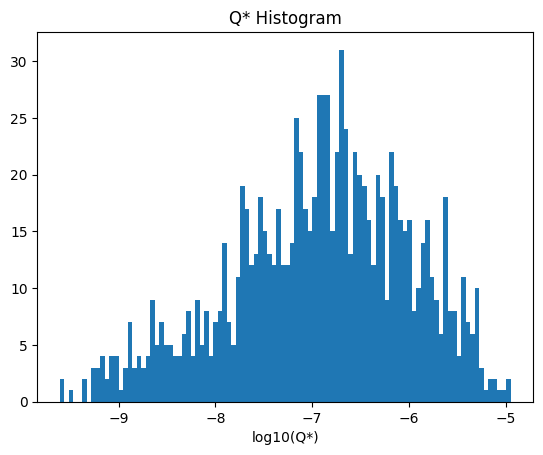

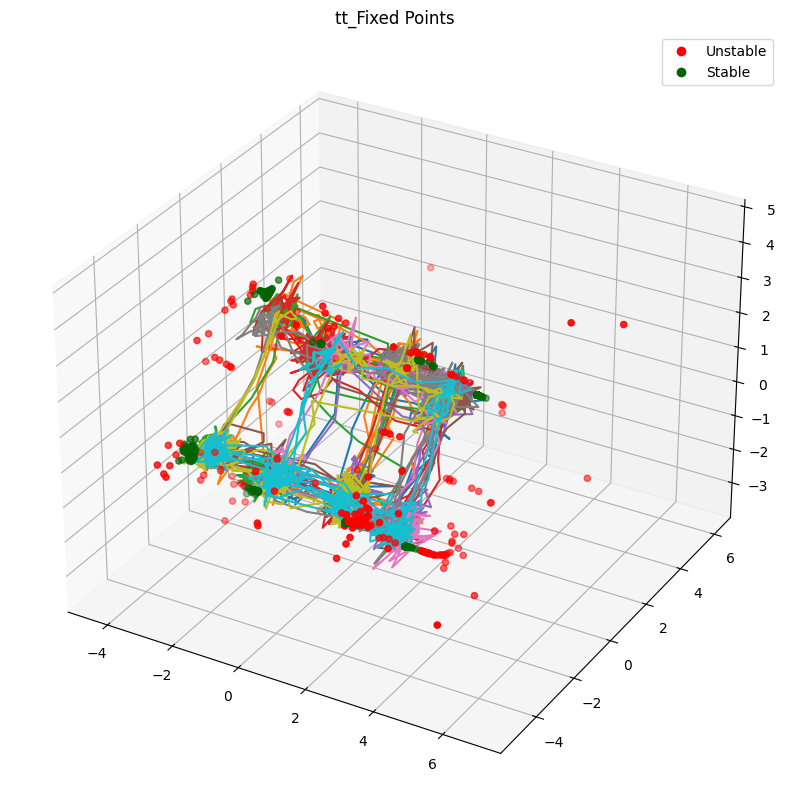

In [6]:
fpsTT = an_TT.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)


Iteration 500/40000
q = 1.49E-03 +/- 9.20E-03
dq = 5.26E-06 +/- 4.18E-05

Iteration 1000/40000
q = 4.52E-04 +/- 2.19E-03
dq = 7.70E-07 +/- 4.30E-06

Iteration 1500/40000
q = 2.26E-04 +/- 1.01E-03
dq = 2.66E-07 +/- 1.29E-06

Iteration 2000/40000
q = 1.35E-04 +/- 5.83E-04
dq = 1.46E-07 +/- 6.87E-07

Iteration 2500/40000
q = 8.89E-05 +/- 3.73E-04
dq = 9.27E-08 +/- 3.60E-07

Iteration 3000/40000
q = 6.19E-05 +/- 2.53E-04
dq = 1.23E-07 +/- 5.85E-07

Iteration 3500/40000
q = 4.51E-05 +/- 1.79E-04
dq = 2.18E-07 +/- 8.22E-07

Iteration 4000/40000
q = 3.38E-05 +/- 1.29E-04
dq = 2.85E-07 +/- 8.85E-07

Iteration 4500/40000
q = 2.59E-05 +/- 9.44E-05
dq = 3.73E-07 +/- 1.01E-06

Iteration 5000/40000
q = 2.05E-05 +/- 6.99E-05
dq = 5.32E-07 +/- 1.47E-06

Iteration 5500/40000
q = 1.65E-05 +/- 5.24E-05
dq = 6.24E-07 +/- 1.59E-06

Iteration 6000/40000
q = 1.37E-05 +/- 3.97E-05
dq = 6.40E-07 +/- 1.58E-06

Iteration 6500/40000
q = 1.16E-05 +/- 3.04E-05
dq = 8.06E-07 +/- 1.90E-06

Iteration 7000/40000
q = 

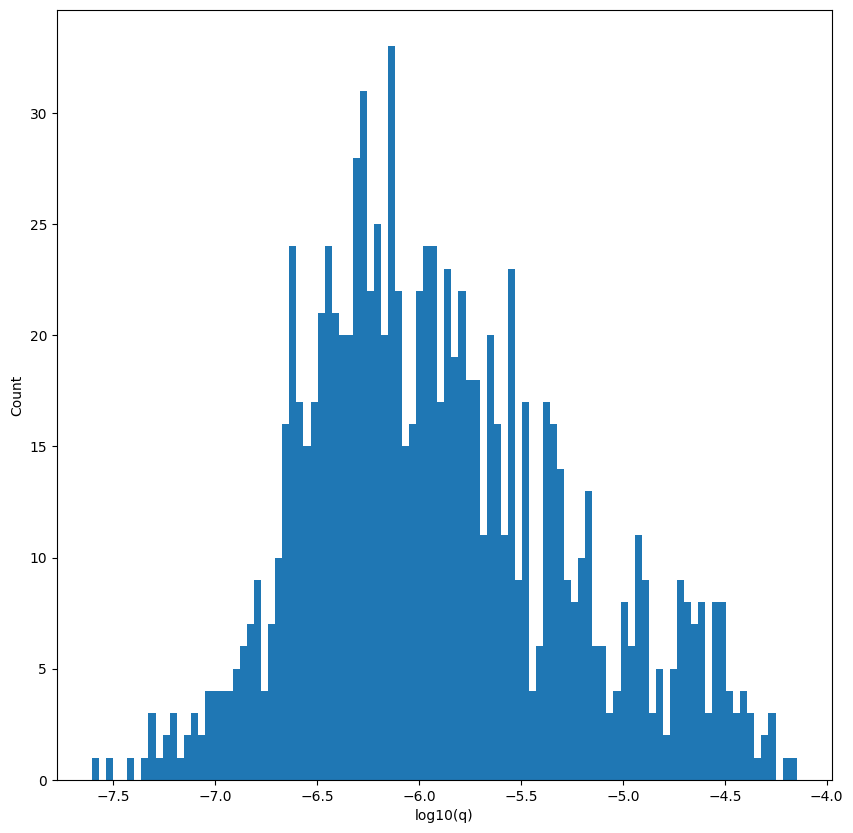

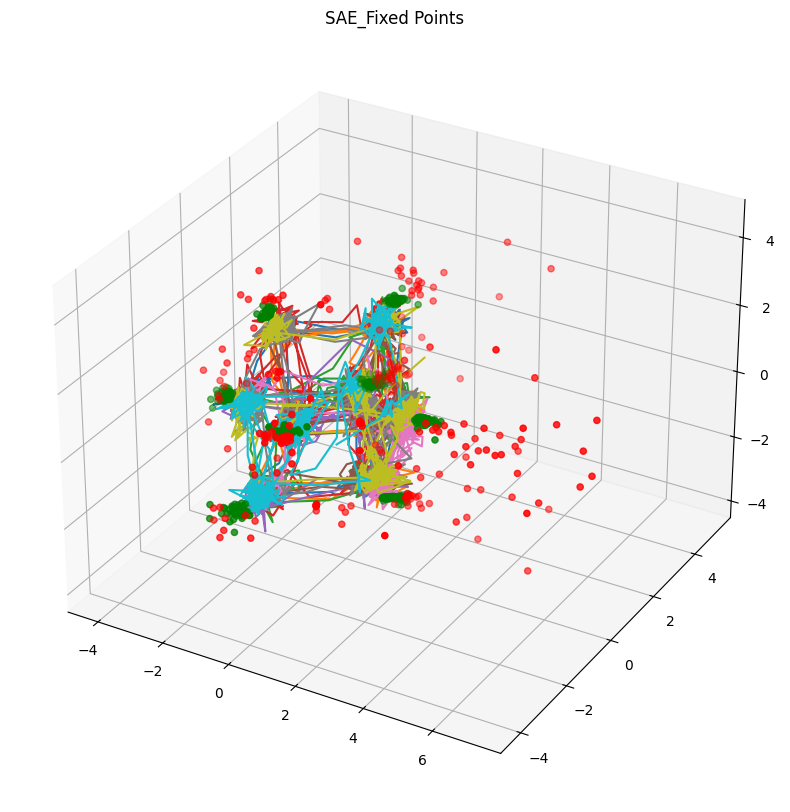

In [7]:
fpsDT_GRU = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)


Iteration 500/40000
q = 7.75E-06 +/- 1.61E-04
dq = 2.08E-09 +/- 2.33E-08

Iteration 1000/40000
q = 3.81E-10 +/- 1.15E-08
dq = 3.41E-11 +/- 8.63E-10

Iteration 1500/40000
q = 8.37E-11 +/- 2.63E-09
dq = 6.78E-11 +/- 2.15E-09

Iteration 2000/40000
q = 1.25E-10 +/- 2.68E-09
dq = 3.97E-11 +/- 8.06E-10

Iteration 2500/40000
q = 2.44E-10 +/- 4.12E-09
dq = 1.92E-10 +/- 4.70E-09

Iteration 3000/40000
q = 2.87E-10 +/- 5.93E-09
dq = 2.14E-10 +/- 6.03E-09

Iteration 3500/40000
q = 8.09E-10 +/- 1.30E-08
dq = 2.58E-10 +/- 3.67E-09

Iteration 4000/40000
q = 6.33E-10 +/- 1.39E-08
dq = 1.55E-10 +/- 1.93E-09

Iteration 4500/40000
q = 5.11E-10 +/- 7.83E-09
dq = 2.56E-10 +/- 4.15E-09

Iteration 5000/40000
q = 1.15E-09 +/- 1.40E-08
dq = 5.65E-10 +/- 6.78E-09

Iteration 5500/40000
q = 2.99E-10 +/- 4.75E-09
dq = 1.77E-10 +/- 3.39E-09

Iteration 6000/40000
q = 7.45E-10 +/- 9.90E-09
dq = 2.82E-10 +/- 3.43E-09

Iteration 6500/40000
q = 1.18E-09 +/- 1.20E-08
dq = 4.15E-10 +/- 3.87E-09

Iteration 7000/40000
q = 

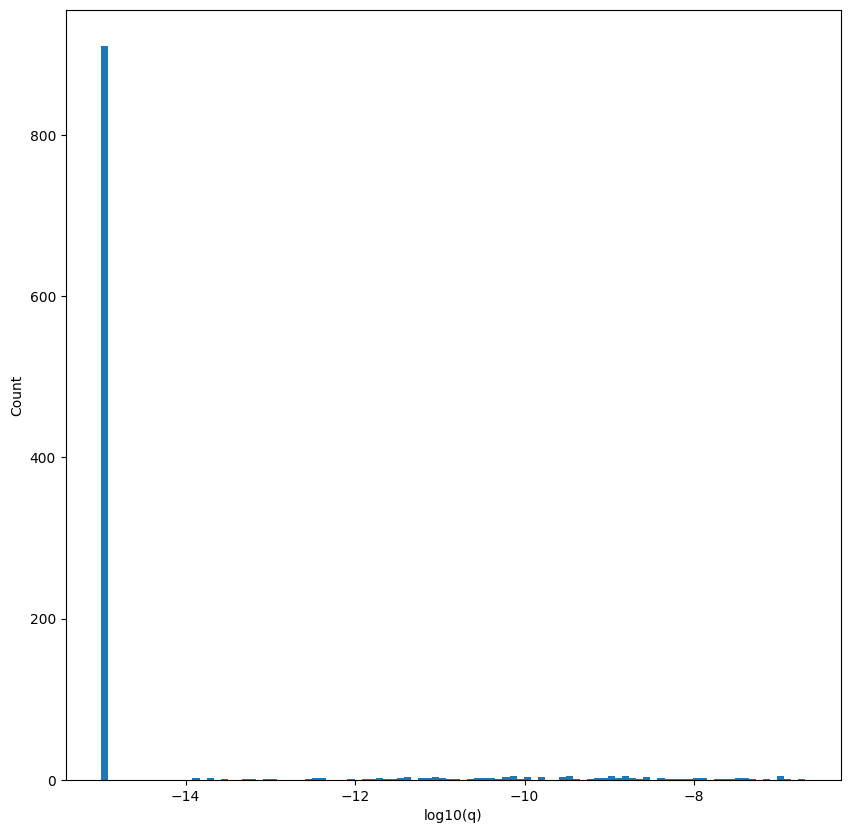

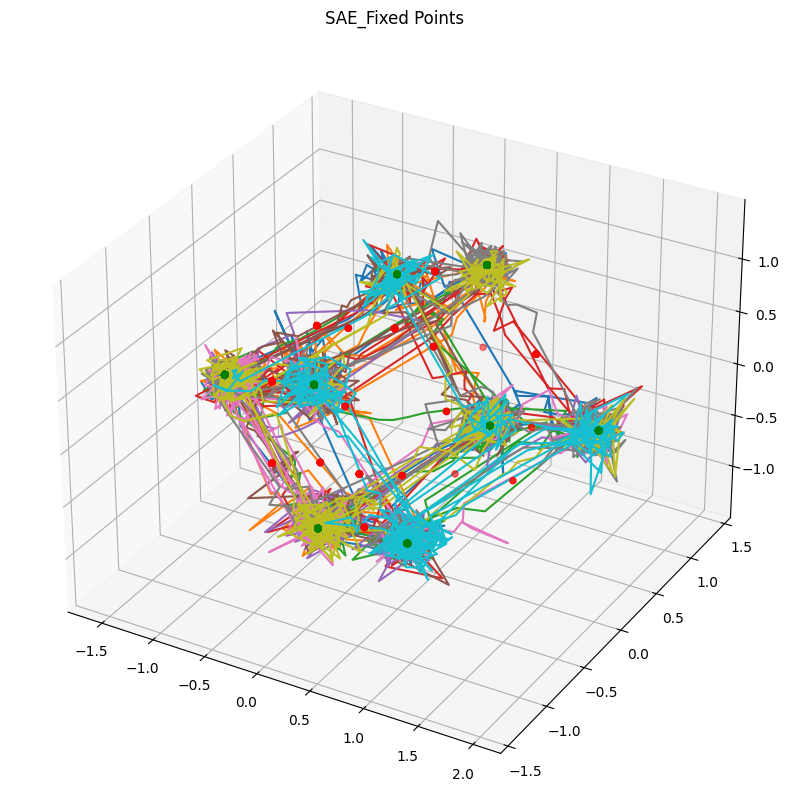

In [8]:
fpsDT_NODE = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)


Iteration 500/40000
q = 8.22E-04 +/- 1.97E-03
dq = 7.67E-07 +/- 1.58E-05

Iteration 1000/40000
q = 6.99E-04 +/- 8.57E-04
dq = 1.47E-07 +/- 2.07E-07

Iteration 1500/40000
q = 6.18E-04 +/- 7.78E-04
dq = 1.76E-07 +/- 2.30E-07

Iteration 2000/40000
q = 5.29E-04 +/- 6.95E-04
dq = 1.90E-07 +/- 2.41E-07

Iteration 2500/40000
q = 4.37E-04 +/- 6.12E-04
dq = 1.95E-07 +/- 2.44E-07

Iteration 3000/40000
q = 3.48E-04 +/- 5.33E-04
dq = 1.90E-07 +/- 2.29E-07

Iteration 3500/40000
q = 2.69E-04 +/- 4.59E-04
dq = 1.92E-07 +/- 2.74E-07

Iteration 4000/40000
q = 2.00E-04 +/- 3.91E-04
dq = 1.76E-07 +/- 3.25E-07

Iteration 4500/40000
q = 1.45E-04 +/- 3.31E-04
dq = 1.92E-07 +/- 3.42E-07

Iteration 5000/40000
q = 1.02E-04 +/- 2.78E-04
dq = 1.87E-07 +/- 3.57E-07

Iteration 5500/40000
q = 7.05E-05 +/- 2.31E-04
dq = 2.14E-07 +/- 4.27E-07

Iteration 6000/40000
q = 4.79E-05 +/- 1.89E-04
dq = 2.54E-07 +/- 5.12E-07

Iteration 6500/40000
q = 3.24E-05 +/- 1.52E-04
dq = 3.03E-07 +/- 6.61E-07

Iteration 7000/40000
q = 

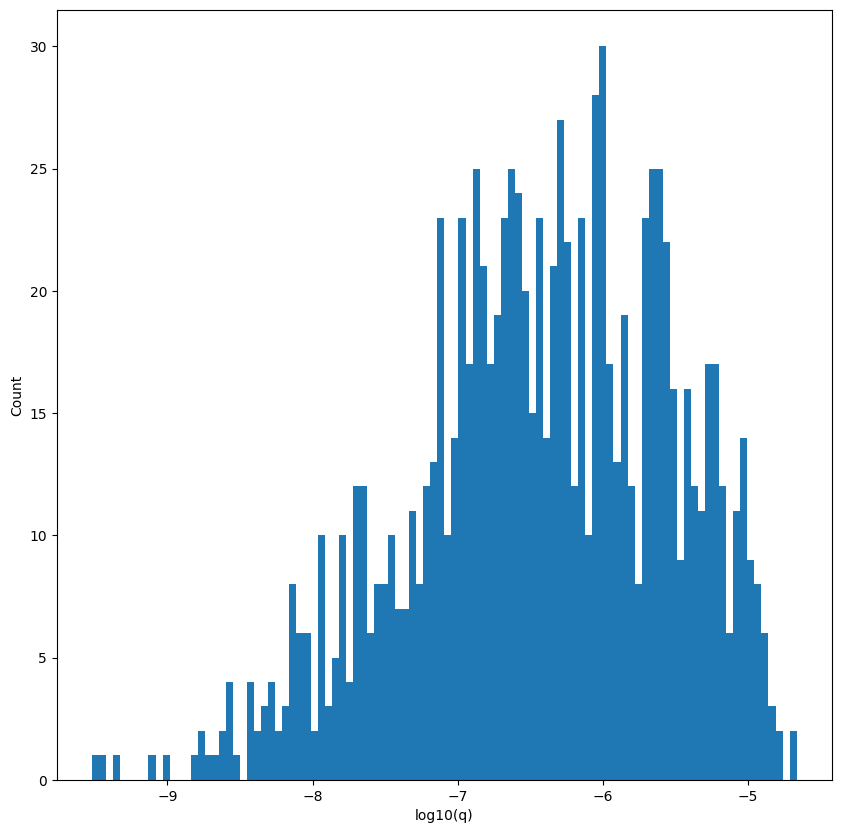

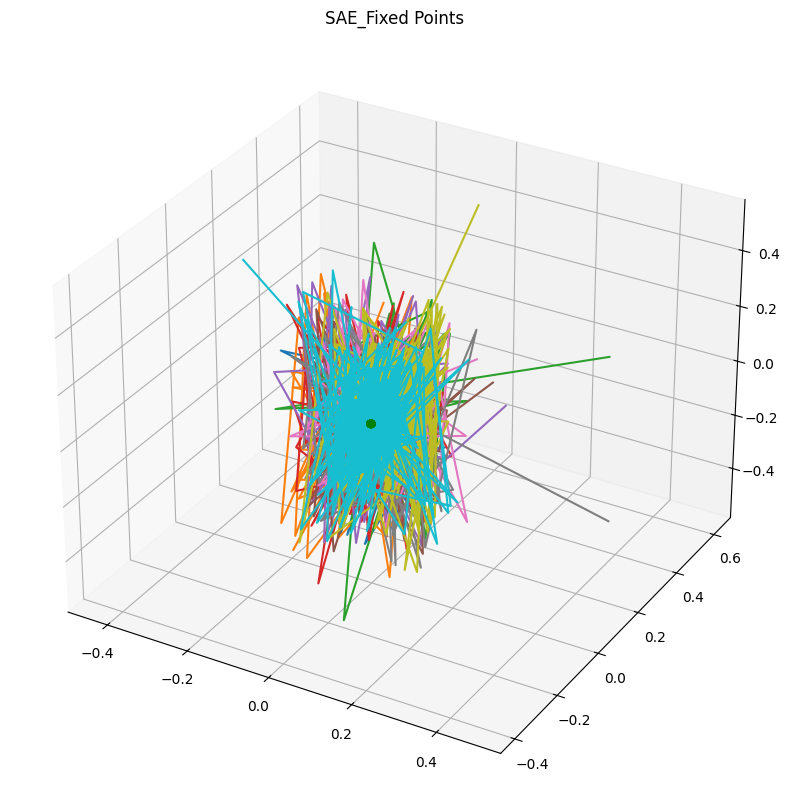

In [9]:
fpsDT_LDS = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

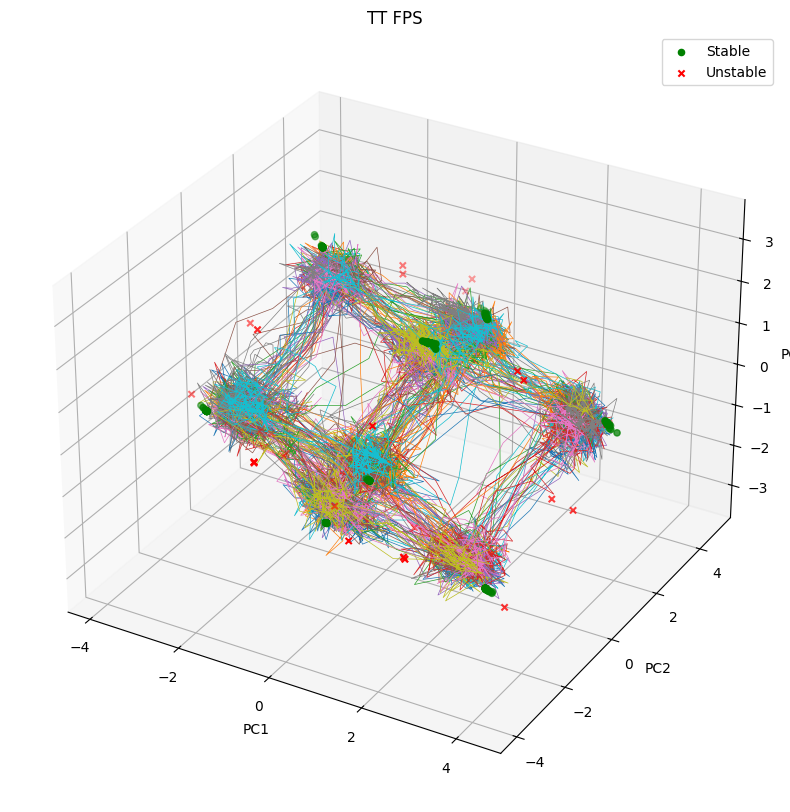

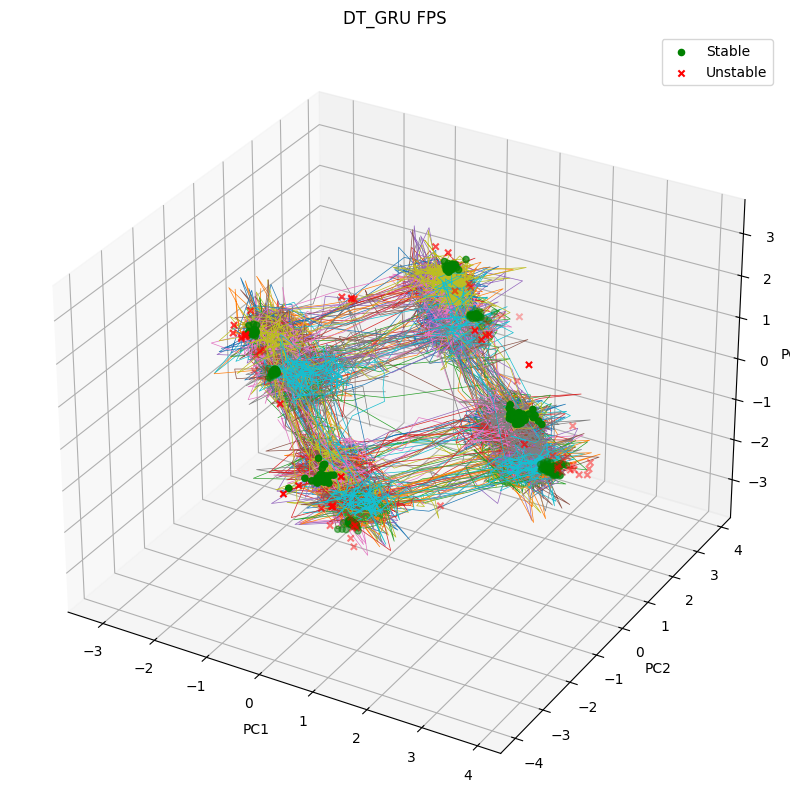

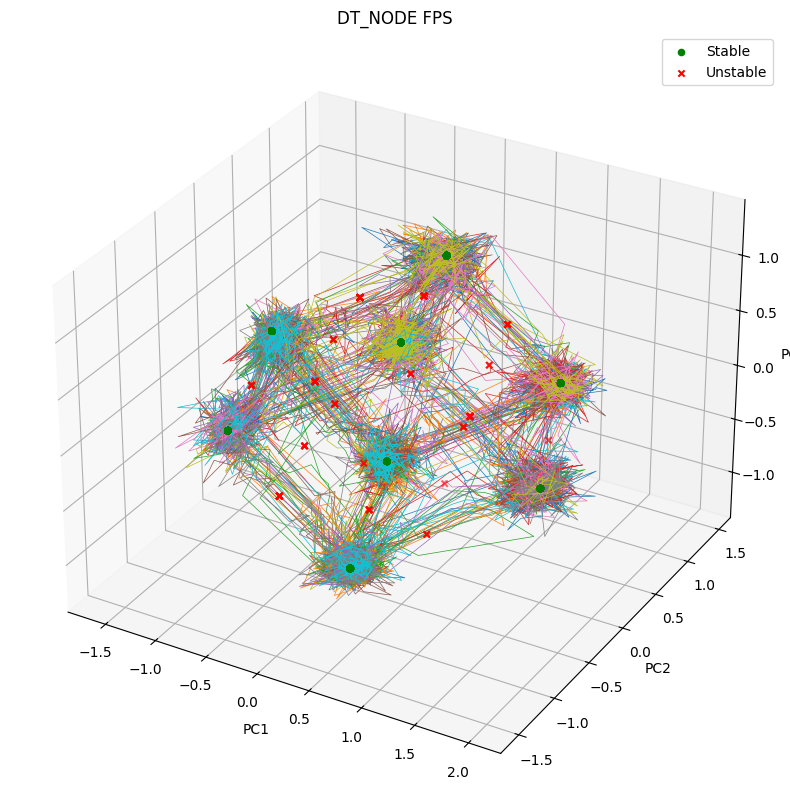

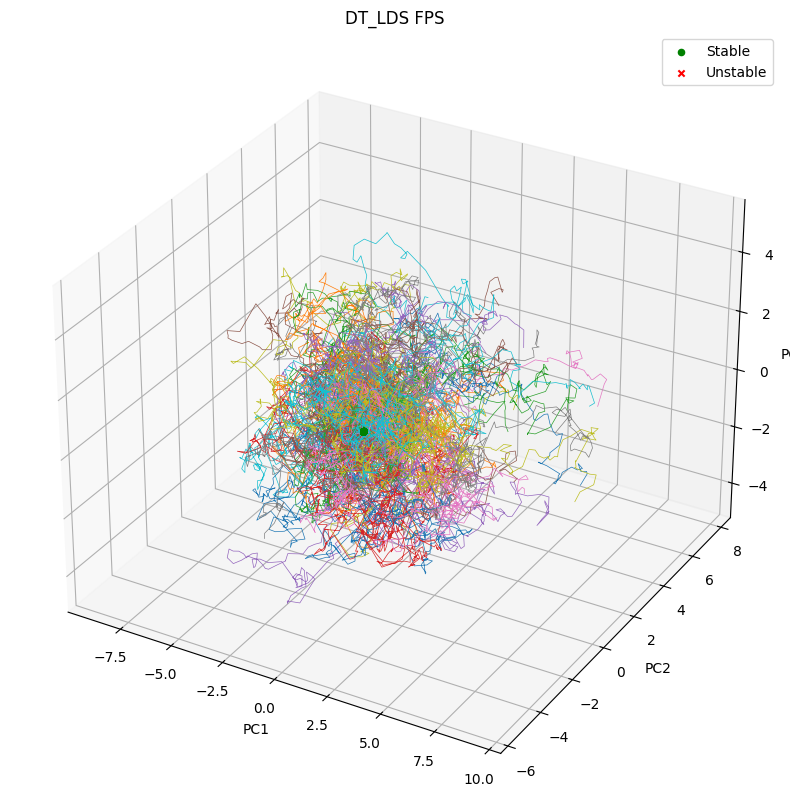

In [34]:
lats_TT = an_TT.get_latents().detach().numpy()
lats_GRU = analysis_GRU.get_latents().detach().numpy()
lats_NODE = analysis_NODE.get_latents().detach().numpy()
lats_LDS = analysis_LDS.get_latents().detach().numpy()

plot_model_fps(fpsTT, latents=lats_TT, q_thresh = 1e-7, label = "TT")
plot_model_fps(fpsDT_GRU, latents = lats_GRU, q_thresh = 1e-6, label = "DT_GRU")
plot_model_fps(fpsDT_NODE, latents = lats_NODE, q_thresh = 1e-7, label = "DT_NODE")
plot_model_fps(fpsDT_LDS, latents = lats_LDS, q_thresh = 1e-7, label = "DT_LDS")

In [28]:

comparison_models = Comparison()
comparison_models.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_models.load_analysis(analysis_GRU, group = "GRU")
comparison_models.load_analysis(analysis_NODE, group = "NODE")
comparison_models.load_analysis(analysis_LDS, group = "LDS")
comparison_models.regroup()

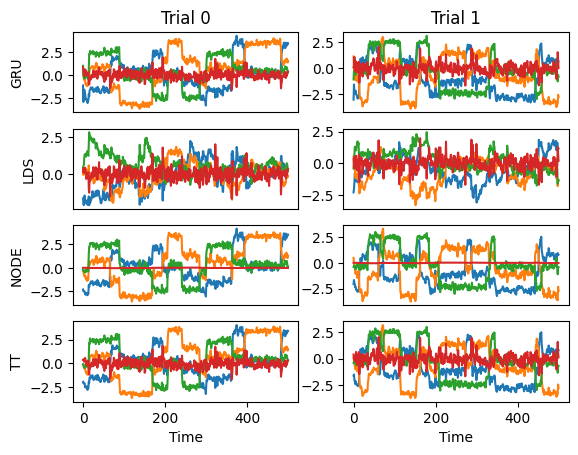

In [37]:
comparison_models.plot_trials_reference(num_trials=2, num_pcs=4)

In [ ]:
lds_fps = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 1e-3,
    n_inits=1024,
    max_iters = 20000,                      
)



In [ ]:
node_fps = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

In [ ]:
gru_fps = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

In [ ]:
plot_model_fps(lds_fps, q_thresh = 1e-4)
plot_model_fps(node_fps, q_thresh = 1e-4)
plot_model_fps(gru_fps, q_thresh = 4e-7)